# 详解 sns.FacetGrid()

`seaborn.FacetGrid` 是一个强大的工具，用于创建基于数据子集的网格图。它允许你根据数据的一个或多个分类变量创建多个子图，并在每个子图中绘制相同类型的图形。

## 基本概念

FacetGrid 的核心思想是"分面"（faceting）：
- 将数据集按照一个或多个分类变量分割
- 在每个数据子集上应用相同的绘图函数
- 将所有结果排列在网格中便于比较

## 基本用法

### 1. 创建 FacetGrid 对象

```python
import seaborn as sns

# 示例数据
tips = sns.load_dataset("tips")

# 创建 FacetGrid
g = sns.FacetGrid(tips, col="time", row="smoker")
```

### 2. 映射绘图函数

```python
g.map(sns.scatterplot, "total_bill", "tip")
```

## 主要参数详解

### 数据相关参数

- `data`: 输入的DataFrame
- `row`: 用于定义网格行的分类变量
- `col`: 用于定义网格列的分类变量
- `hue`: 用于定义颜色的分类变量（在同一子图中创建分组）
- `col_wrap`: 当使用多个col变量时，定义每行显示多少列

### 外观控制参数

- `height`: 每个子图的高度（英寸）
- `aspect`: 每个子图的宽高比（宽度=高度×aspect）
- `palette`: 颜色调色板
- `sharex`, `sharey`: 是否共享x/y轴（默认为True）

### 其他参数

- `margin_titles`: 是否在外边缘显示标题
- `legend_out`: 是否将图例放在图形外

## 高级用法

### 1. 多变量分面

```python
g = sns.FacetGrid(tips, col="day", hue="sex")
g.map(sns.scatterplot, "total_bill", "tip").add_legend()
```

### 2. 自定义绘图函数

```python
def custom_plot(x, y, **kwargs):
    sns.scatterplot(x, y, **kwargs)
    plt.axhline(y=5, color='r', linestyle='--')

g = sns.FacetGrid(tips, col="time")
g.map(custom_plot, "total_bill", "tip")
```

### 3. 控制子图顺序

```python
g = sns.FacetGrid(tips, col="day", col_order=["Thur", "Fri", "Sat", "Sun"])
```

### 4. 添加图例和标题

```python
g = sns.FacetGrid(tips, col="time", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip")
g.add_legend()
g.set_titles("{col_name} 餐")  # 自定义子图标题
```

## 实际应用示例

```python
# 加载数据
exercise = sns.load_dataset("exercise")

# 创建FacetGrid
g = sns.FacetGrid(exercise, col="kind", row="diet", 
                  margin_titles=True, height=3.5)

# 绘制图形
g.map(sns.boxplot, "pulse", order=[1, 2, 3], palette="Set2")

# 自定义外观
g.set_axis_labels("运动时间", "脉搏")
g.set_titles("{row_name}饮食 | {col_name}运动")
g.fig.subplots_adjust(wspace=0.1, hspace=0.25)
```

## 注意事项

1. `map()` 方法中指定的绘图函数必须与数据变量兼容
2. 当数据集很大时，FacetGrid可能会创建大量子图，导致图形难以阅读
3. 可以通过调整`height`和`aspect`参数来控制整体布局
4. 使用`col_wrap`可以避免创建过宽的行

FacetGrid 是探索数据分类关系的强大工具，特别适合在数据可视化初期快速了解数据分布模式。

`FacetGrid` 本身**不属于分布图或分类图**，而是一个**多子图网格系统**，用于**组织和展示数据的分类关系**。它的核心功能是**按分类变量拆分数据**，并在子图中绘制指定的图表类型（可以是分布图、分类图或其他任何图形）。  

### 1. **FacetGrid 的分类属性**
- **按分类变量分组**：`FacetGrid` 的主要作用是基于 **分类变量**（如 `sex`, `time`, `smoker` 等）将数据拆分成多个子集，并在独立的子图中展示。  
- **不限定图表类型**：它本身不绘制具体图形，而是通过 `.map()` 方法调用其他绘图函数（如 `sns.histplot`, `sns.boxplot`, `sns.scatterplot` 等），因此可以生成分布图、分类图或关系图。  

### 2. **与分布图、分类图的区别**
| 类型       | 特点                                                                 | 示例                          |
|------------|----------------------------------------------------------------------|-------------------------------|
| **分布图** | 展示数据的分布（连续或离散）                                         | `histplot`, `kdeplot`, `ecdfplot` |
| **分类图** | 比较分类变量之间的关系（如分类 vs 数值）                             | `boxplot`, `barplot`, `violinplot` |
| **FacetGrid** | **按分类变量分组**，并在子图中绘制任意图形（可以是分布图或分类图） | `FacetGrid + histplot`（分布）<br> `FacetGrid + boxplot`（分类） |

### 3. **典型用例**
#### (1) **分布图 + FacetGrid**  
按分类变量分组后，绘制分布图（如直方图、密度图）：
```python
g = sns.FacetGrid(tips, col="time", hue="sex")  # 按时间和性别分组
g.map(sns.histplot, "total_bill", alpha=0.6)     # 每个子图绘制分布
```
→ 这里 `FacetGrid` 帮助拆分了数据，但实际绘图的是 `histplot`（分布图）。  

#### (2) **分类图 + FacetGrid**  
按分类变量分组后，绘制分类比较图（如箱线图）：
```python
g = sns.FacetGrid(tips, col="day", row="smoker")  # 按天和吸烟者分组
g.map(sns.boxplot, "sex", "tip")                  # 每个子图绘制分类比较
```
→ 这里 `FacetGrid` 拆分数据，但实际绘图的是 `boxplot`（分类图）。  

### 4. **总结**
- **FacetGrid 是「分面网格」**：它的核心功能是**按分类变量分组并排列子图**，不限定具体图形类型。  
- **依赖 `.map()` 的绘图函数**：最终图表类型由映射的函数决定（如 `histplot` 是分布图，`boxplot` 是分类图）。  
- **属于「结构化绘图」工具**：与 `PairGrid`、`JointGrid` 类似，是 Seaborn 中用于**多图布局的高级接口**。  

如果需要明确分类，可以认为 `FacetGrid` 是 **「分类绘图的支持工具」**，而非独立的图表类型。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

,r,slow,medium,fast
71,7.171717,7.171717,14.343434,28.686869
50,5.050505,5.050505,10.101010,20.202020
3,0.303030,0.303030,0.606061,1.212121
45,4.545455,4.545455,9.090909,18.181818
19,1.919192,1.919192,3.838384,7.676768
60,6.060606,6.060606,12.121212,24.242424
63,6.363636,6.363636,12.727273,25.454545
83,8.383838,8.383838,16.767677,33.535354
74,7.474747,7.474747,14.949495,29.898990
47,4.747475,4.747475,9.494949,18.989899


,r,speed,theta
71,7.171717,slow,7.171717
185,8.585859,medium,17.171717
188,8.888889,medium,17.777778
99,10.000000,slow,10.000000
76,7.676768,slow,7.676768
126,2.626263,medium,5.252525
68,6.868687,slow,6.868687
60,6.060606,slow,6.060606
152,5.252525,medium,10.505051
273,7.373737,fast,29.494949


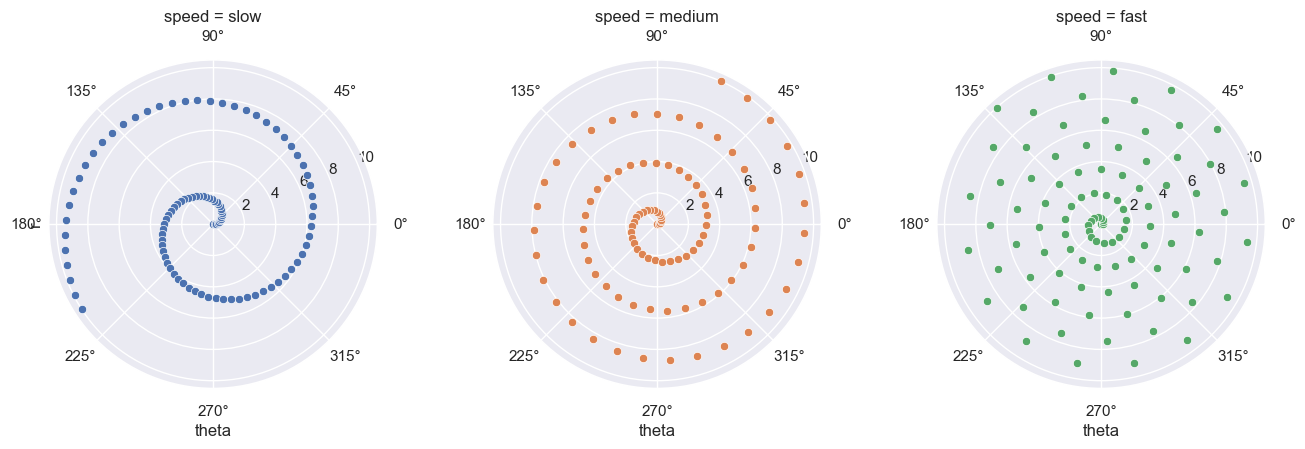

In [ ]:
sns.set_theme()

# Generate an example radial datast
r = np.linspace(0, 10, num=100)     # 从0到10的100个等间距值（半径值）
# 创建DataFrame包含：
#     r：半径列
#     slow = r（线性增长）
#     medium = 2r（两倍速增长）
#     fast = 4r（四倍速增长）
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})
display(df.sample(10))

# Convert the dataframe to long-form or "tidy" format
# 将宽格式数据转为长格式（"tidy"格式）
df = pd.melt(
    df,
    id_vars=['r'],      # 保留r列作为标识列
    var_name='speed',   # 将原列名（slow/medium/fast）存入新列"speed"
    value_name='theta'  # 将原值存入新列"theta"
    )
display(df.sample(10))

# Set up a grid of axes with a polar projection
g = sns.FacetGrid(
    df,
    col="speed",        # 按speed列的值（slow/medium/fast）分列显示
    hue="speed",        # 按speed列自动分配颜色
    subplot_kws=dict(projection='polar'),   # 设置极坐标投影（核心！）
    height=4.5,
    sharex=False,       # 各子图坐标轴独立
    sharey=False,       # 各子图坐标轴独立
    despine=False       # 保留所有坐标轴边框
    )

# Draw a scatterplot onto each axes in the grid
# 在每个子图上绘制极坐标散点图：
#     x轴：theta（角度值，这里实际用作线性值）
#     y轴：r（半径值）
# 由于设置了极坐标投影，x/y会自动转换为角度/半径
g.map(sns.scatterplot, "theta", "r")

,position,step,walk
33,0,3,6
21,-1,1,4
37,0,2,7
46,1,1,9
60,0,0,12
4,0,4,0
15,0,0,3
17,0,2,3
98,1,3,19
24,-1,4,4


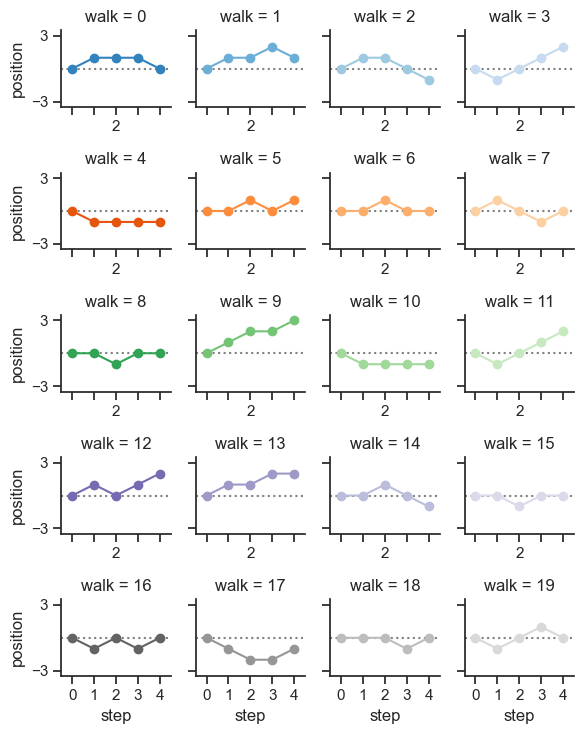

In [7]:
# 使用简洁的白色背景 + 坐标轴刻度线（无网格线）
# 默认会移除上方和右侧的边框（despine=True）
# 适合科学图表，避免视觉干扰
sns.set_theme(style="ticks")

# 生成随机游走数据
# Create a dataset with many short random walks
rs = np.random.RandomState(4)
# 生成 20 条随机游走路径，每条路径 5 步
# 每步的取值为 -1（左）、0（不动）、1（右）
# 对每条路径计算累积和（模拟随机游走的轨迹）
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
# 将所有路径的起点归零（标准化）
# np.newaxis：增加一个维度，将形状从 (20,) 变为 (20, 1)。为了广播（Broadcasting）规则：pos 是 (20, 5)，而起点需要是 (20, 1) 才能正确相减。
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)        # 重复 [0,1,2,3,4] 20 次（每条路径的步数编号）
walk = np.repeat(range(20), 5)      # 重复 [0,1,...,19] 5 次（路径ID）

# 列：position（位置）、step（步数）、walk（路径ID）
# 行：共 100 行（20 条路径 × 5 步）
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])
display(df.sample(10))

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.refline(y=0, linestyle=":")    # 在每个子图中添加一条水平参考线（y=0）

# Draw a line plot to show the trajectory of each random walk
# 绘制随机游走轨迹
#     "step" 为 x 轴（步数）
#     "position" 为 y 轴（位置）
#     marker="o"：用圆圈标记每一步的位置
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
# 调整坐标轴
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
# 自动调整子图间距, 避免子图标题或标签重叠. 设置子图之间的水平间距为 1（单位：英寸）
grid.fig.tight_layout(w_pad=1)

这段代码创建了一个精美的重叠密度图（KDE图）分面可视化

,x,g
0,64.038123,A
1,66.147050,B
2,66.370011,C
3,68.791019,D
4,70.583534,E
...,...,...
495,69.358022,F
496,72.212877,G
497,70.474247,H
498,73.251022,I


c:\Users\LH\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\LH\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\LH\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\LH\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all

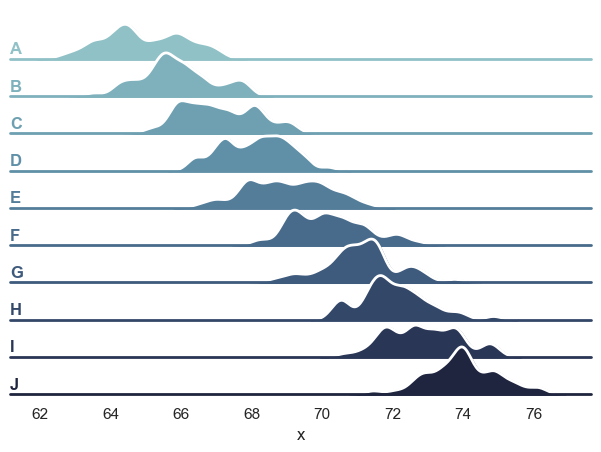

In [17]:
# style="white"：设置白色背景主题
# rc={"axes.facecolor": (0, 0, 0, 0)}：将坐标轴背景设为完全透明（RGBA中的(0,0,0,0)）
# 这样设置是为了后续创建重叠效果做准备
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)                         # 生成500个标准正态分布随机数
g = np.tile(list("ABCDEFGHIJ"), 50)       # 创建分组标签（A-J重复50次）
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m            # 将每个组的x值偏移其ASCII码值（A=65, B=66等）

display(df)

# Initialize the FacetGrid object
# 创建10色的cubehelix调色板（对应A-J 10个组）
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
# 绘制填充的KDE图，设置带宽调整系数0.5
g.map(sns.kdeplot, "x",
      bw_adjust=0.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# 在同一位置绘制白色边框的KDE图，创造描边效果
g.map(sns.kdeplot, "x",
      clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
# 在y=0处添加参考线
# color=None：使用hue映射的颜色（与每组颜色一致）
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# 自定义函数在每个子图左侧添加组标签（A-J）
# 使用坐标轴坐标系统（transform=ax.transAxes）定位
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "x")

# Set the subplots to overlap
# 设置负的子图间距（hspace=-.25），使子图重叠
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")                    # 移除所有标题
g.set(yticks=[], ylabel="")         # 移除y轴刻度和标签
g.despine(bottom=True, left=True)   # 移除底部和左侧的轴线

## 最终效果

这段代码创造了一个精美的垂直排列的重叠密度图：
1. 10个组（A-J）各自有不同颜色的密度分布
2. 密度图有白色描边，提高可读性
3. 子图间有负间距，形成重叠效果
4. 左侧显示组标签
5. 整体风格简洁现代

这种可视化非常适合比较多个组的分布情况，同时保持紧凑的布局。